<a href="https://colab.research.google.com/github/sajeebju/Seismic-Lab/blob/main/Exercise_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The travel time data for a reflected wave are
given in the following table.

In [1]:
import pandas as pd
import numpy as np

x_neg = np.array([-1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0])
time_neg = np.array([1.252, 1.222, 1.193, 1.165, 1.14, 1.115, 1.093, 1.072, 1.053, 1.036, 1.029, 1.022, 1.016, 1.01, 1.005, 1])
x_pos = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3473, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
time_pos = np.array([0.996, 0.992, 0.99, 0.987, 0.986, 0.985, 0.9848, 0.985, 0.988, 0.993, 1, 1.01, 1.023, 1.037, 1.054, 1.073])

df = pd.DataFrame({"x_neg(km)" : x_neg, "time_neg(s)" : time_neg, "x_pos(km)" : x_pos, "time_pos(s)" : time_pos})
df

,x_neg(km),time_neg(s),x_pos(km),time_pos(s)
0,-1.20,1.252,0.0500,0.9960
1,-1.10,1.222,0.1000,0.9920
2,-1.00,1.193,0.1500,0.9900
3,-0.90,1.165,0.2000,0.9870
4,-0.80,1.140,0.2500,0.9860
5,-0.70,1.115,0.3000,0.9850
6,-0.60,1.093,0.3473,0.9848
7,-0.50,1.072,0.4000,0.9850
8,-0.40,1.053,0.5000,0.9880
9,-0.30,1.036,0.6000,0.9930


1.Determine approximately the overburden velocity and the reflector dip.

2.Compute Vs and plot the dynamically corrected reflection section for the given data
set.

3.Transform graphically the reflection section into a migrated depth section and verify
that the structural dip corresponds to that determined in 1.

From the velocity found above, what rock types you would expect to encounter in a drill
hole?

In [2]:
# Normal  Moveout Determination

def normalMoveOut(t1, t2, t0):
  nmo = (t1 + t2 - 2*t0) / 2
  return nmo

t1 = 1.252
t2 = 1.073
t0 = 1

NMO = round(normalMoveOut(t1, t2, t0), 4)
print("Normal Moveout = ", NMO)

Normal Moveout =  0.1625


In [3]:
#Overbureden Velocity

def overBurdenVelocity(x, del_t, t0):
  v = np.sqrt(x**2 / (2 * t0 * del_t))
  return v

x = 1.2
del_t = NMO
t0 = 1

ov = round(overBurdenVelocity(x, del_t, t0), 3)
print("Overburden velocity = ", ov, " km/s")


Overburden velocity =  2.105  km/s


In [4]:
# Reflector dip determination using dip moveout

def reflector_dip(v, del_td, del_x):
  phi = np.degrees(np.arcsin((v/2) * (del_td / del_x)))
  return phi

del_td = round(df.iloc[0]["time_neg(s)"] - df.iloc[len(df["time_pos(s)"]) - 1]["time_pos(s)"], 2)
del_x = 1.2

dip = round(reflector_dip(ov, del_td, del_x), 1)

print("Reflector dip = ", dip, " degree")

Reflector dip =  9.1  degree


In [5]:
# stacking velocity determination

def stackingVelocity(v, phi):
  Vs = v / abs(np.cos(phi))
  return Vs

v = ov
phi = dip
sv = round(stackingVelocity(v, phi), 3)
print("Stacking velocity = ", sv, " km/s")

Stacking velocity =  2.221  km/s


In [6]:
# dynamically corrected reflection section
# tn(x/2) = sqrt(((t(x)**2 - (x**2/Vs**2))))

def dynamically_corrected_neg(tx_neg, x, sv):
  var1 =  tx_neg**2 - ((x**2)/(sv**2))
  tn = np.power(abs(var1), 0.5)
  return tn

def dynamically_corrected_pos(tx_pos, x, sv):
  var2 = tx_pos**2 - ((x**2)/(sv**2))
  tn = np.power(abs(var2), 0.5)
  return tn

tx_neg = 1.252
tx_pos = 1.073
sv = 2.221
x = 1.2
dc_neg = round(dynamically_corrected_neg(tx_neg, x, sv),3)
dc_pos = round(dynamically_corrected_pos(tx_pos, x, sv), 3)

print("Dynamically corrected tn_neg = ", dc_neg, " s")
print("Dynamically corrected tn_pos = ", dc_pos, " s")


Dynamically corrected tn_neg =  1.129  s
Dynamically corrected tn_pos =  0.927  s


In [10]:
# depth determination

d1 = round((dc_neg * ov) / 2 , 2)
d2 = round((dc_pos * ov) / 2, 2)

print("Depth_1 = ", d1, " km")
print("Depth_2 = ", d2, " km")

Depth_1 =  1.19  km
Depth_2 =  0.98  km


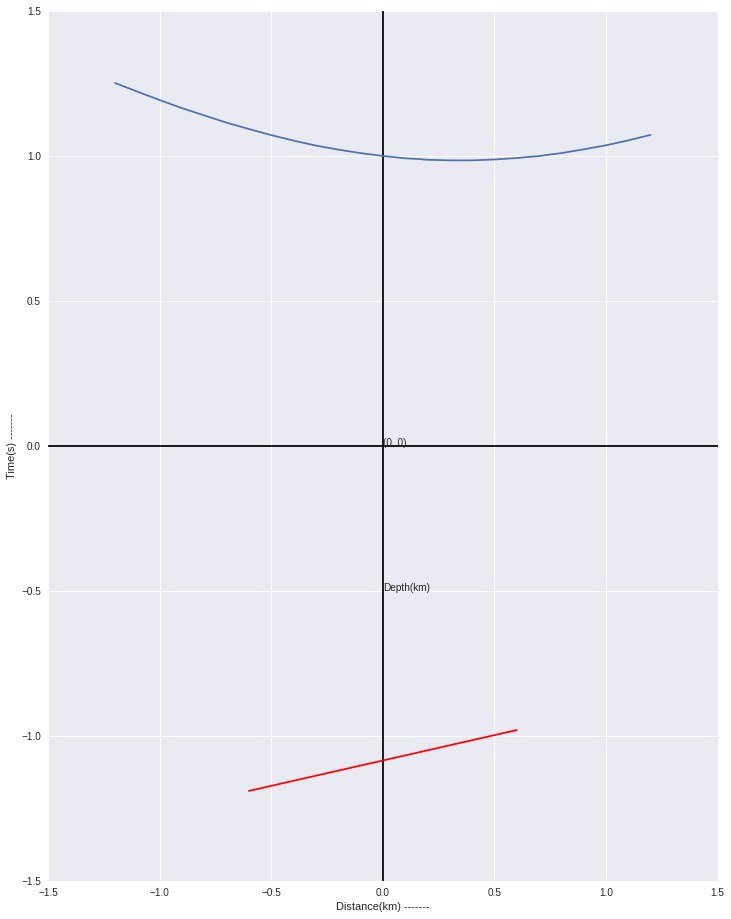

In [28]:
# plotting distance and time

import matplotlib.pyplot as plt
plt.style.use("seaborn")

d_neg = np.array([-0.6, 0.6])
d_pos = np.array([-1.19, -0.98])

offset_neg = df["x_neg(km)"].to_numpy()
offset_pos = df["x_pos(km)"].to_numpy()

time_neg = df["time_neg(s)"].to_numpy()
time_pos = df["time_pos(s)"].to_numpy()

offset_arr = np.concatenate([offset_neg, offset_pos])
time_arr = np.concatenate([time_neg, time_pos])

plt.figure(figsize = (12, 16))
plt.plot(offset_arr, time_arr)
plt.plot(d_neg, d_pos, color = "r")
plt.annotate("(0, 0)", (0, 0))
plt.annotate("Depth(km)", (0, -0.5))
plt.xlabel("Distance(km) -------")
plt.ylabel("Time(s) -------")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.hlines(0, -1.5, 1.5)
plt.vlines(0, -1.5, 1.5)
plt.grid(True)
plt.show()